In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Steel_industry_data.csv.zip")

In [ ]:
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


target variable usage_kwh

In [ ]:
df.isnull().sum()

,0
date,0
Usage_kWh,0
Lagging_Current_Reactive.Power_kVarh,0
Leading_Current_Reactive_Power_kVarh,0
CO2(tCO2),0
Lagging_Current_Power_Factor,0
Leading_Current_Power_Factor,0
NSM,0
WeekStatus,0
Day_of_week,0


performming label encoding


In [ ]:
df['Day_of_week'].unique() #label encoding

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categories = df['Day_of_week']
encoded_labels = label_encoder.fit_transform(categories)
df['Day_of_week']=encoded_labels
print(encoded_labels)

[1 1 1 ... 1 1 1]


In [ ]:
df['WeekStatus'].unique() #label encoding

array(['Weekday', 'Weekend'], dtype=object)

In [ ]:

label_encoder = LabelEncoder()
categories = df['WeekStatus']
encoded_labels = label_encoder.fit_transform(categories)
df['WeekStatus']=encoded_labels

print(encoded_labels)



[0 0 0 ... 0 0 0]


In [ ]:
df['Load_Type'].unique() #ordinal encoding

array(['Light_Load', 'Medium_Load', 'Maximum_Load'], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
categories = df['Load_Type']
encoded_labels = ordinal_encoder.fit_transform(categories.values.reshape(-1, 1))
df['Load_Type']=encoded_labels

print(encoded_labels)


[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  int64  
 9   Day_of_week                           35040 non-null  int64  
 10  Load_Type                             35040 non-null  float64
dtypes: float64(7), 

because in our dataset date and time is important we are converting it and make that model can understand

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour

df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

df.head()


,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,year,month,day,hour,hour_sin,hour_cos
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0.0,2018,1,1,0,0.000000,1.000000
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0.0,2018,1,1,0,0.000000,1.000000
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0.0,2018,1,1,0,0.000000,1.000000
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0.0,2018,1,1,1,0.258819,0.965926
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0.0,2018,1,1,1,0.258819,0.965926


In [ ]:
df['year'].unique()

array([2018], dtype=int32)

In [ ]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type', 'year', 'month', 'day',
       'hour', 'hour_sin', 'hour_cos'],
      dtype='object')

In [ ]:
df.tail()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,year,month,day,hour,hour_sin,hour_cos
35035,2018-12-31 23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,0,1,0.0,2018,12,31,23,-0.258819,0.965926
35036,2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,0,1,0.0,2018,12,31,23,-0.258819,0.965926
35037,2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,0,1,0.0,2018,12,31,23,-0.258819,0.965926
35038,2018-12-31 23:45:00,3.78,3.06,0.11,0.0,77.72,99.96,85500,0,1,0.0,2018,12,31,23,-0.258819,0.965926
35039,2018-12-31 00:00:00,3.67,3.02,0.07,0.0,77.22,99.98,0,0,1,0.0,2018,12,31,0,0.000000,1.000000


In [ ]:
df = df.drop(['year','date','WeekStatus'], axis=1,inplace=False)

In [ ]:
'''Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outlier_lower = Q1 - 1.5 * IQR
outlier_upper = Q3 + 1.5 * IQR

outliers = (df < outlier_lower) | (df > outlier_upper)
print("Outlier counts per column:\n", outliers.sum())'''


'Q1 = df.quantile(0.25)\nQ3 = df.quantile(0.75)\nIQR = Q3 - Q1\n\noutlier_lower = Q1 - 1.5 * IQR\noutlier_upper = Q3 + 1.5 * IQR\n\noutliers = (df < outlier_lower) | (df > outlier_upper)\nprint("Outlier counts per column:\n", outliers.sum())'

In [ ]:
'''df = df[~((df < outlier_lower) | (df > outlier_upper)).any(axis=1)]
print("Shape after removing outliers:", df.shape)'''


'df = df[~((df < outlier_lower) | (df > outlier_upper)).any(axis=1)]\nprint("Shape after removing outliers:", df.shape)'

In [ ]:
df.columns

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Day_of_week', 'Load_Type', 'month', 'day', 'hour', 'hour_sin',
       'hour_cos'],
      dtype='object')

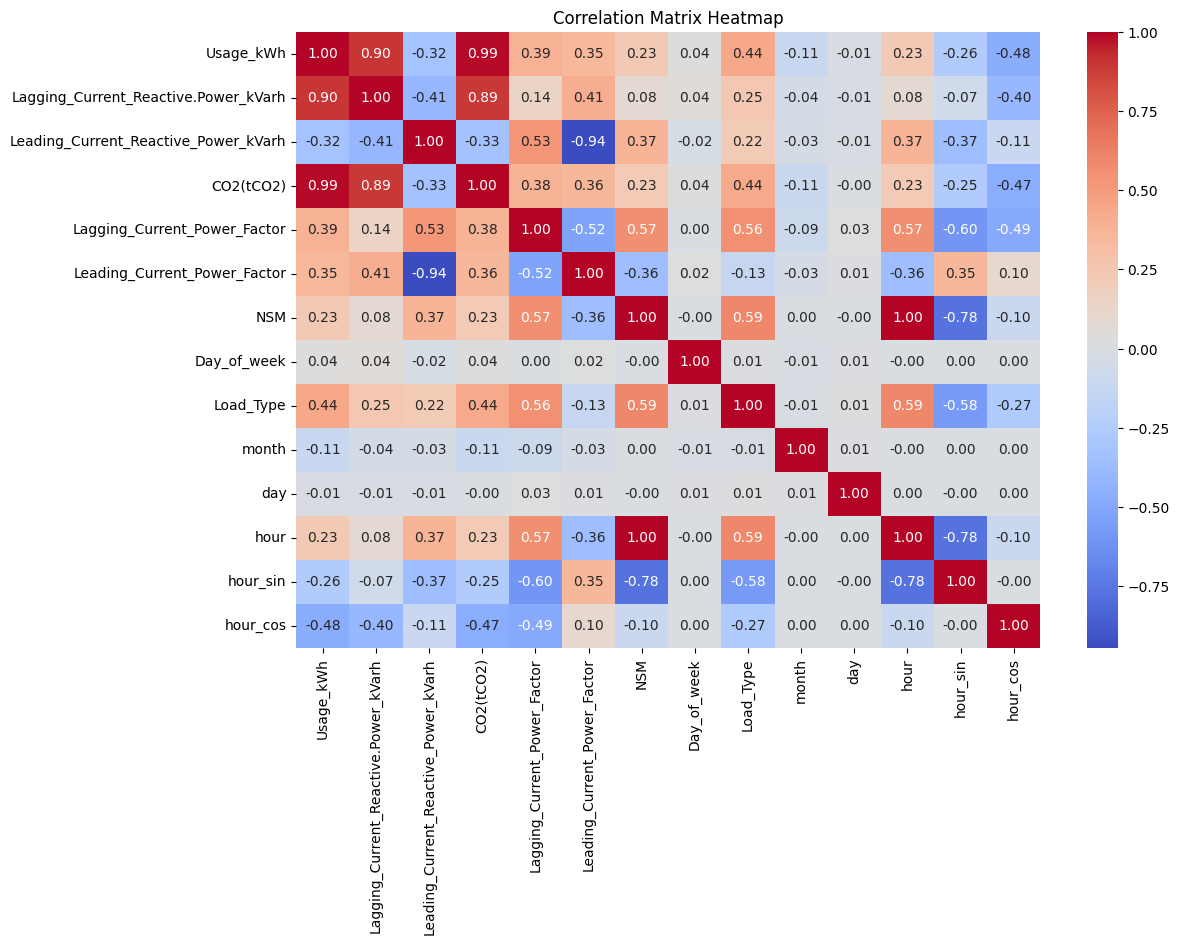

In [ ]:

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()




In [ ]:
target = 'Usage_kWh'
correlation_with_target = correlation_matrix[target].drop(target)  # Exclude self-correlation
print("Correlation with target variable (usage_kwh):\n", correlation_with_target)

threshold = 0.8

high_correlation = correlation_matrix.abs() > threshold

np.fill_diagonal(high_correlation.values, False)

features_to_drop = set()
for col in high_correlation.columns:
    if col != target and any(high_correlation[col]):
        correlated_features = high_correlation.index[high_correlation[col]].tolist()
        correlated_with_target = [f for f in correlated_features if f != target]
        if correlated_with_target:
            features_to_drop.update(correlated_with_target)

print("Features to drop due to high correlation:", features_to_drop)


Correlation with target variable (usage_kwh):
 Lagging_Current_Reactive.Power_kVarh    0.896150
Leading_Current_Reactive_Power_kVarh   -0.324922
CO2(tCO2)                               0.988180
Lagging_Current_Power_Factor            0.385960
Leading_Current_Power_Factor            0.353566
NSM                                     0.234610
Day_of_week                             0.039865
Load_Type                               0.444092
month                                  -0.113961
day                                    -0.008170
hour                                    0.234175
hour_sin                               -0.258409
hour_cos                               -0.477181
Name: Usage_kWh, dtype: float64
Features to drop due to high correlation: {'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Leading_Current_Power_Factor', 'hour', 'NSM'}


In [ ]:
df.drop(['NSM','Lagging_Current_Reactive.Power_kVarh'], axis=1, inplace=True)

starting of model building
do->
1)train test split
2)standarad scalar
3)cross validation
4)model evaluation

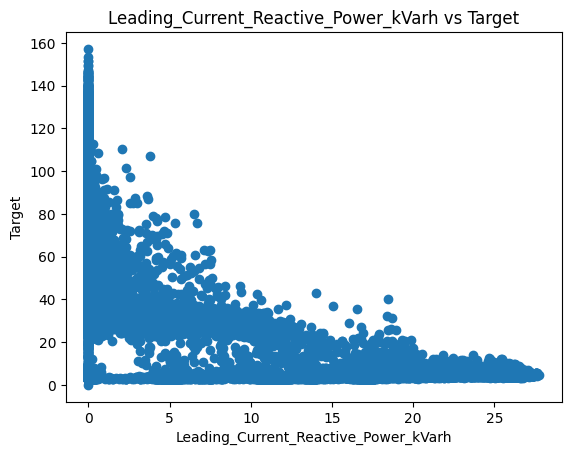

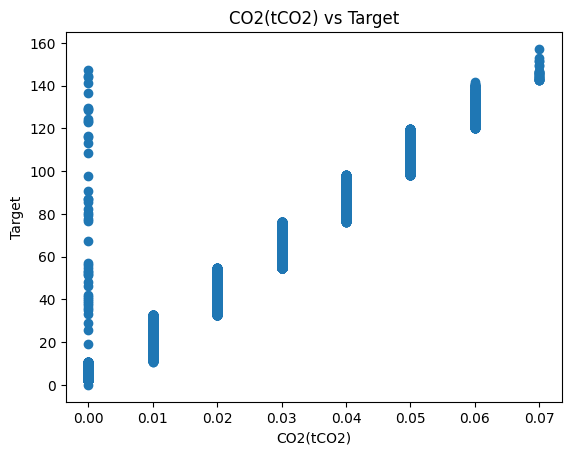

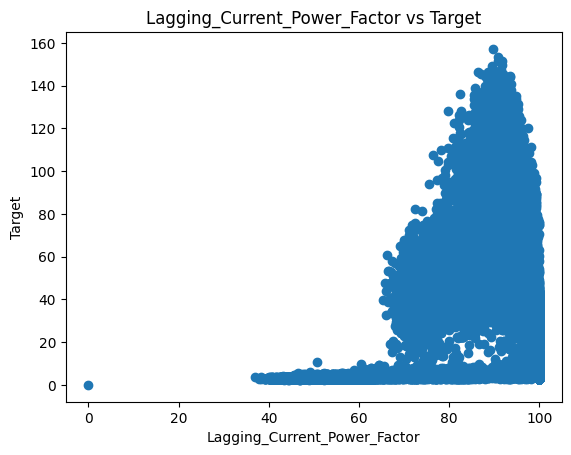

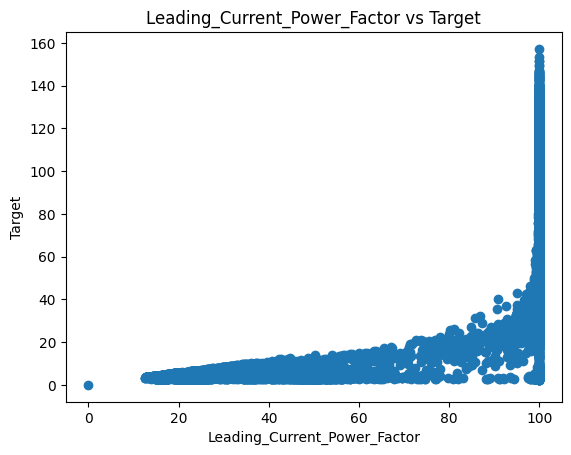

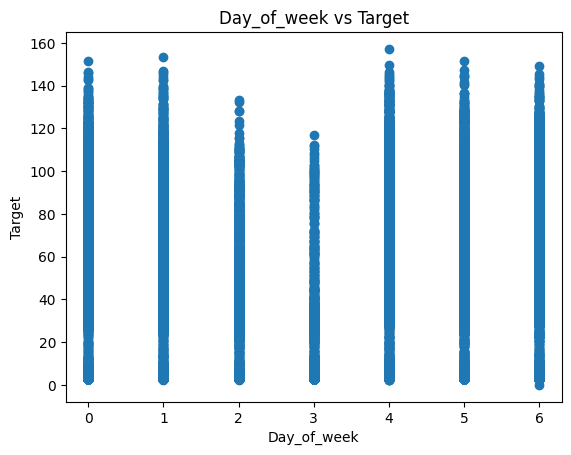

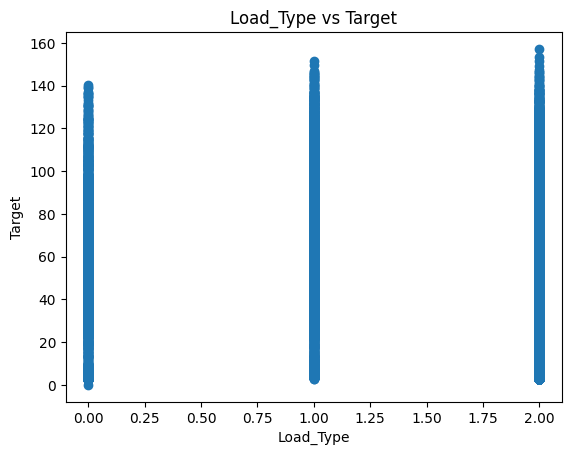

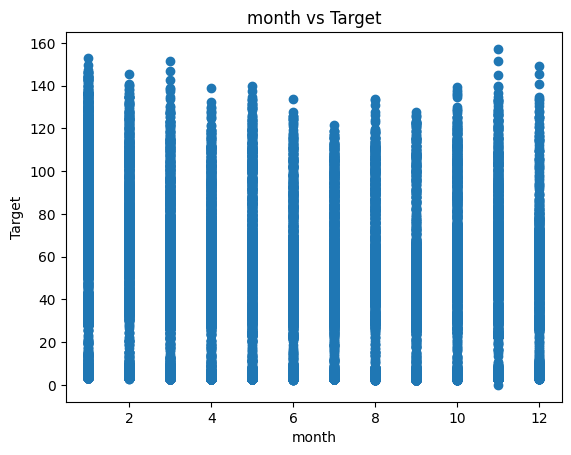

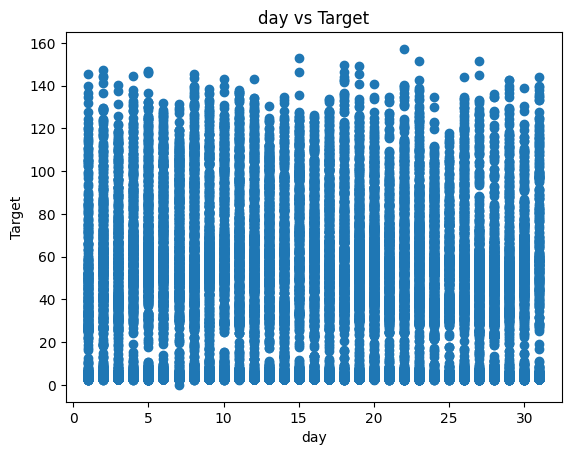

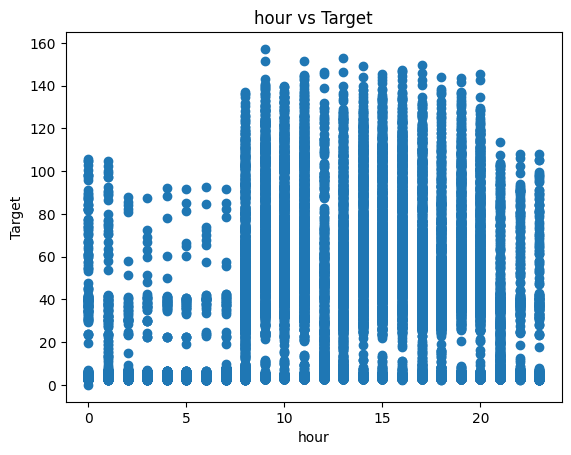

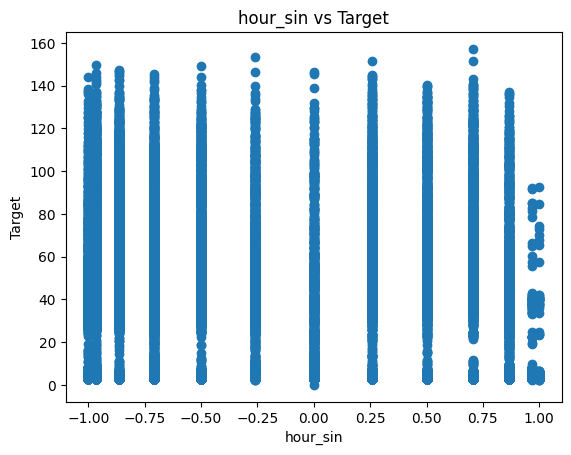

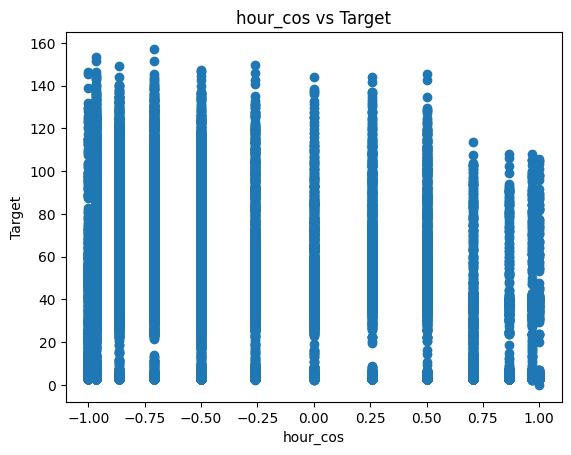

In [ ]:
# Replace 'target' with your target variable
for column in df.columns:
    if column != 'Usage_kWh':  # Exclude the target variable
        plt.scatter(df[column], df['Usage_kWh'])
        plt.title(f'{column} vs Target')
        plt.xlabel(column)
        plt.ylabel('Target')
        plt.show()


In [ ]:
X = df.drop('Usage_kWh',axis=1)
y= df['Usage_kWh']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:
#help(SVR)

In [ ]:
# Linear Kernel
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train, y_train)
# Evaluate Linear Kernel
y_pred_linear = svr_linear.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Kernel R² Score: {r2_linear:.2f}")
print(f"Linear Kernel Mean Squared Error: {mse_linear:.2f}")


Linear Kernel R² Score: 0.98
Linear Kernel Mean Squared Error: 19.72


In [ ]:

# Polynomial Kernel
svr_poly = SVR(kernel='poly', degree=3, C=1.0, epsilon=0.1)
svr_poly.fit(X_train, y_train)

# Evaluate Polynomial Kernel
y_pred_poly = svr_poly.predict(X_test)
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"Polynomial Kernel R² Score: {r2_poly:.2f}")
print(f"Polynomial Kernel Mean Squared Error: {mse_poly:.2f}")


Polynomial Kernel R² Score: 0.98
Polynomial Kernel Mean Squared Error: 25.02


In [ ]:

# RBF Kernel
svr_rbf = SVR(kernel='rbf', C=1.0, gamma=0.1, epsilon=0.1)
svr_rbf.fit(X_train, y_train)

# Evaluate RBF Kernel
y_pred_rbf = svr_rbf.predict(X_test)
r2_rbf = r2_score(y_test, y_pred_rbf)
mse_rbf = mean_squared_error(y_test, y_pred_rbf)
print(f"RBF Kernel R² Score: {r2_rbf:.2f}")
print(f"RBF Kernel Mean Squared Error: {mse_rbf:.2f}")


RBF Kernel R² Score: 0.98
RBF Kernel Mean Squared Error: 20.85


In [ ]:
from sklearn.linear_model import LinearRegression
#initialize The Linear Regression
lr = LinearRegression()
# Train the model
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred_lr = lr.predict(X_test)

In [ ]:
# Evaluate the model
mse_lr=mean_squared_error(y_test, y_pred_lr)
r2_lr=r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error : {mse_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}")

Mean Squared Error : 19.68
R² Score: 0.98


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")

In [ ]:
from sklearn.tree import DecisionTreeRegressor
#initilize decision tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred_dt = dt_model.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)
MSE_DT=mean_squared_error(y_test, y_pred_dt)
print(f"mean square error: {MSE_DT:.2f}")
print(f"R-squared: {r2_dt:.2f}")